# Importing Libraries 

In [2]:
# Importing all neccesary libraries
# %pip install pandas scikit-learn

import pandas as pd # Pandas
import numpy as np # Numpy
from scipy import stats # Scipy - for statistics
import matplotlib.pyplot as plt # Matplotlib - for ploting
import seaborn as sns # Seaborn - for ploting
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor




# Importing Data 

In [3]:
# Importing data 
#diebetes_df = pd.read_excel('Diabetes_Data.xlsx')
main_titanic_df = pd.read_csv('titanic3.csv')
red_wine_df = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine_df = pd.read_csv('winequality-white.csv', delimiter=';')

#titanic_df.info()

# Question 2

Data preparation and pre-prunign annalysis 

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_41836\3690937397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_41836\3690937397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].mean())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with

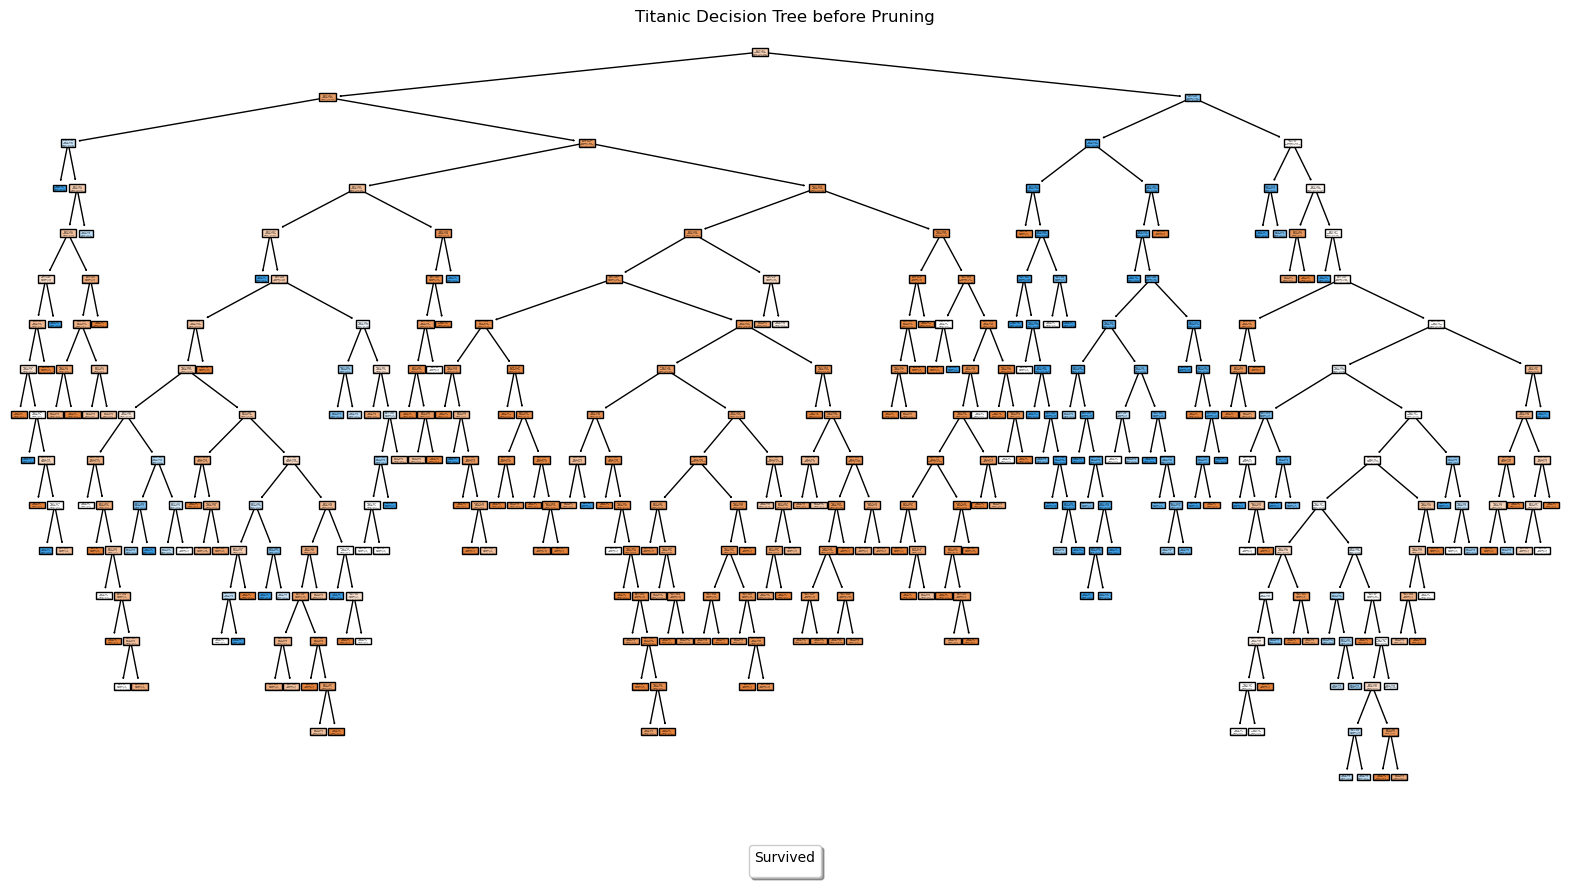

Accuracy for each fold: [0.50763359 0.75954198 0.67557252 0.66412214 0.63601533]
Mean Accuracy: 0.6485771109356263
Misclassification Error for each fold: [0.49236641 0.24045802 0.32442748 0.33587786 0.36398467]
Mean Misclassification Error: 0.3514228890643737
Test Accuracy: 0.8015267175572519
Test Misclassification Error: 0.1984732824427481
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       144
           1       0.86      0.67      0.75       118

    accuracy                           0.80       262
   macro avg       0.81      0.79      0.79       262
weighted avg       0.81      0.80      0.80       262



In [4]:
#Splitting age into age groups
#titanic_df['age_group'] = pd.cut(titanic_df['age'], bins=[0, 12, 19, 34, 64, 120], labels=['Children', 'Adolescents', 'Young Adults', 'Middle-Aged Adults', 'Seniors'])

# Choosing neccessary columns
titanic_df = main_titanic_df[['age', 'sex', 'pclass', 'survived']]
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].mean())

X = titanic_df.drop(columns=['survived'])
y = titanic_df['survived']

# Fitting a decision tree classifier 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X, y)

# Display the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title('Titanic Decision Tree before Pruning')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, title='Survived')
plt.show()

# 5-fold cross-validation to calculate accuracy
cv_scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')
print(f'Accuracy for each fold: {cv_scores}') # Output accuracy for each fold
print(f'Mean Accuracy: {np.mean(cv_scores)}')
misclassification_error = 1 - cv_scores
print(f'Misclassification Error for each fold: {misclassification_error}') # Output misclassification error for each fold
print(f'Mean Misclassification Error: {np.mean(misclassification_error)}')

# Accuracy on the test set
test_accuracy = dt_clf.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Misclassification Error: {1 - test_accuracy}')





# Prediction on test data
y_pred = dt_clf.predict(X_test)

# Evaluate the model
#print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Missclassification error using cross validation
#missclassification_error = 1 - accuracy_score(y_test, y_pred)
#print(f'Missclassification error: {missclassification_error}') 


Pruning and post pruning annalysis

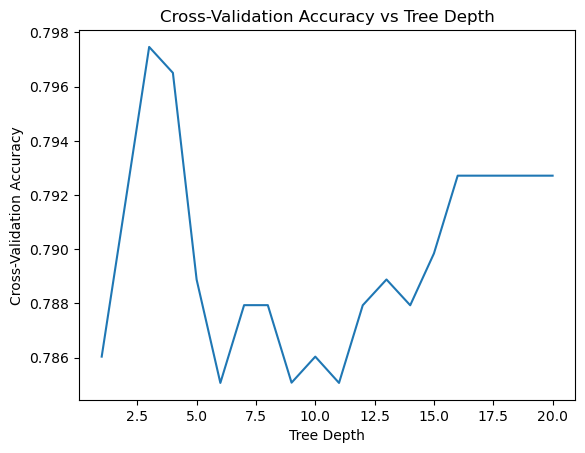

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best Tree Depth: 3, Cross-Validation Accuracy: 0.7974663932558669


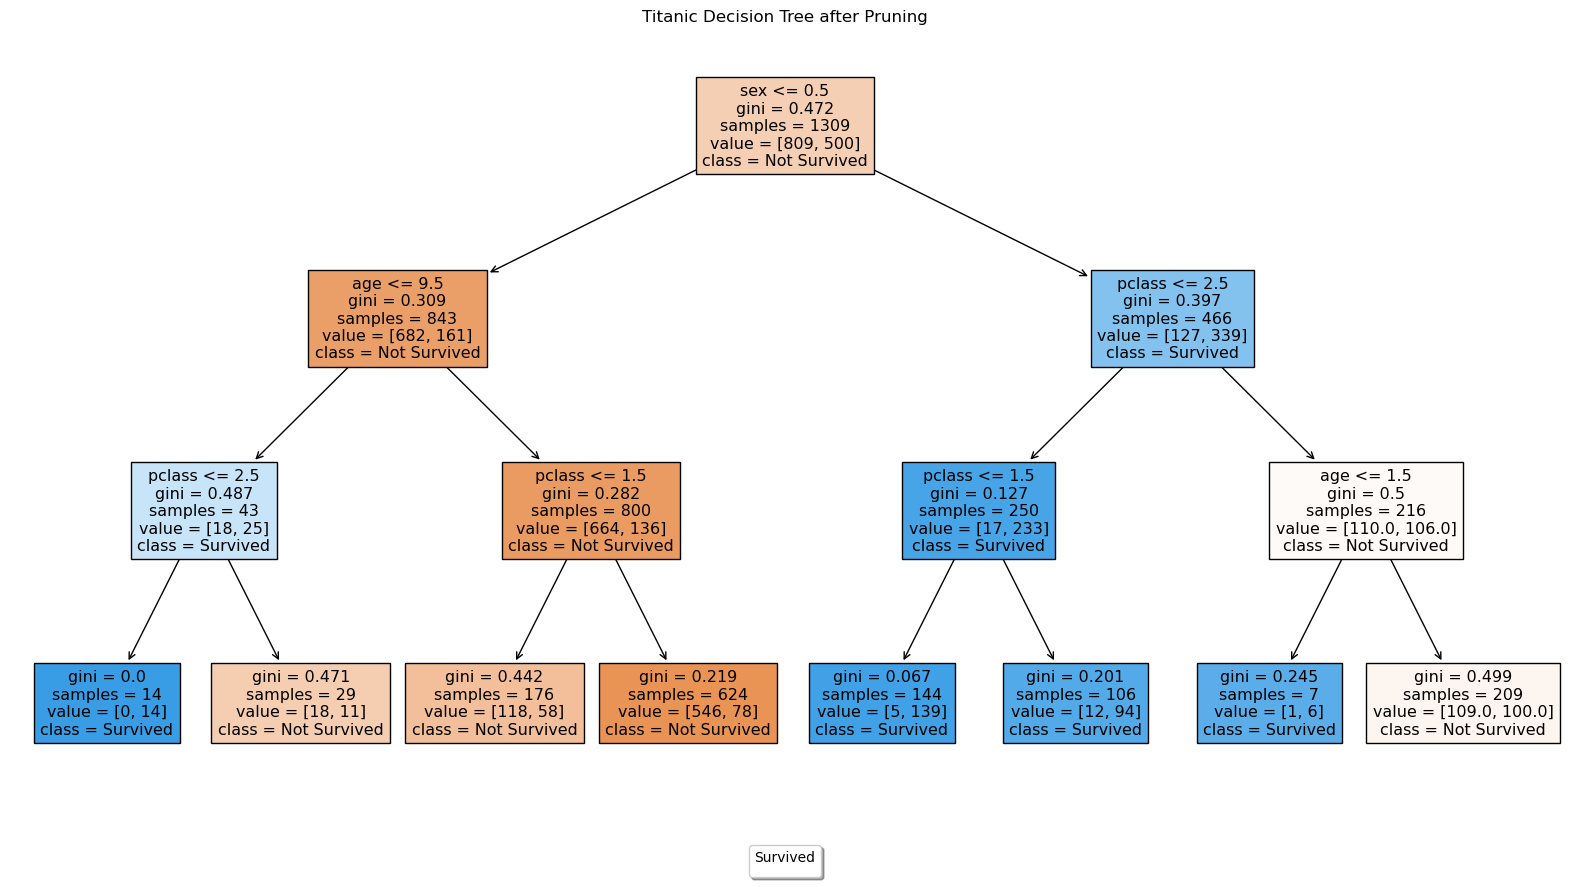

Misclassification Error for each fold: [0.48473282 0.1870229  0.24045802 0.31679389 0.37931034]
Mean Misclassification Error: 0.32166359568307457
Accuracy for each fold: [0.51526718 0.8129771  0.75954198 0.68320611 0.62068966]
Mean Accuracy: 0.6783364043169254
Test Accuracy: 0.8015267175572519
Test Misclassification Error: 0.1984732824427481
Cross validation scores:  [0.38502674 0.83957219 0.78609626 0.81283422 0.73262032 0.63101604
 0.63101604]
Mean: 0.6883116883116883, Standard Deviation: 0.14563065905774983
0.7366412213740458
              precision    recall  f1-score   support

           0       0.68      0.97      0.80       144
           1       0.93      0.45      0.61       118

    accuracy                           0.74       262
   macro avg       0.81      0.71      0.70       262
weighted avg       0.79      0.74      0.71       262

Missclassification error: 0.26335877862595425
Cross validaiton score: [0.8        0.75333333 0.81333333 0.77333333 0.81208054 0.76510067
 

In [5]:
# Performing k-fold cross-validation to evaluate performance for different tree depths
depth_range = range(1, 21)  # Trying depths from 1 to 20
cv_scores = []  # Storing the average cross-validation scores for each depth

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))  # Average score for this depth

plt.plot(depth_range, cv_scores)
plt.xlabel("Tree Depth")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Cross-Validation Accuracy vs Tree Depth")
plt.show()

# Find the best tree depth and its score
best_score = np.max(cv_scores)
best_depth = depth_range[np.argmax(cv_scores)]
print(f"Best Tree Depth: {best_depth}, Cross-Validation Accuracy: {best_score}")

# Fit the best decision tree
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
#best_tree.fit(X_train, y_train)
best_tree.fit(X, y)

# Display new decision tree after cross-validation
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title('Titanic Decision Tree after Pruning')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, title='Survived')
plt.show()


# 5-fold cross-validation to calculate accuracy
cv_scores = cross_val_score(best_tree, X, y, cv=5, scoring='accuracy')
misclassification_error = 1 - cv_scores
print(f'Misclassification Error for each fold: {misclassification_error}') # Output misclassification error for each fold
print(f'Mean Misclassification Error: {np.mean(misclassification_error)}')
print(f'Accuracy for each fold: {cv_scores}') # Output accuracy for each fold
print(f'Mean Accuracy: {np.mean(cv_scores)}')

# Accuracy on the test set
test_accuracy = dt_clf.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Misclassification Error: {1 - test_accuracy}')







# Cross validation score
scores = cross_val_score(best_tree, X, y, cv=7)
print("Cross validation scores: ", scores)
dt_meand, dt_std = scores.mean(), scores.std()
print(f"Mean: {dt_meand}, Standard Deviation: {dt_std}")





# Predict on test data
y_pred = best_tree.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Missclassification error
missclassification_error = 1 - accuracy_score(y_test, y_pred)
print(f'Missclassification error: {missclassification_error}')  


cross_val_score(dt_clf, X_train, y_train, cv=7)

# Logistic Regression using cross-validation 
#log_reg = LogisticRegression()
#scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
scores = cross_val_score(dt_clf, X_train, y_train, cv=7)

print("Cross validaiton score:",scores)

# Accuracy
accuracy = np.mean(scores)
print("Accuracy:", accuracy)



# Question 3: Classification using KNN

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_41836\996525446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_41836\996525446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].mean())  # Fill missing age with mean


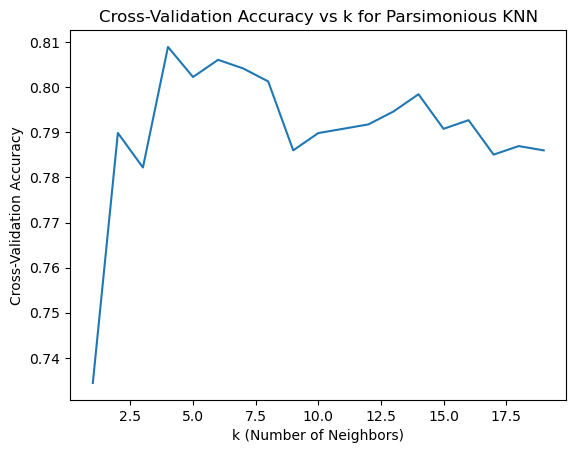

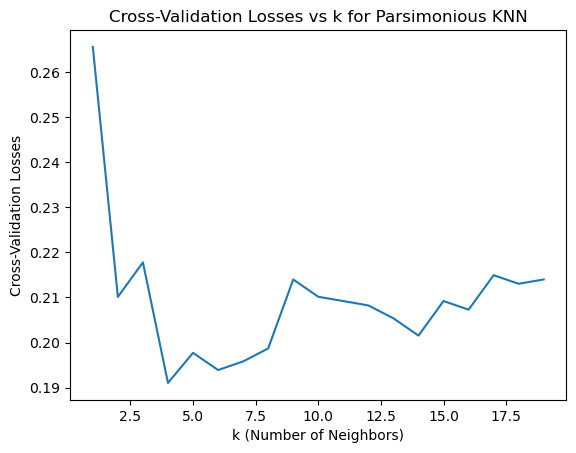

Best K value: 4, Best Cross-Validation Accuracy: 0.8089450899977215


KNeighborsClassifier(n_neighbors=4)

In [6]:
# Gettign the necessary columns
titanic_df = main_titanic_df[['age', 'sex', 'pclass', 'survived']]

# Preprocessing the data: handling missing 'age' and encoding 'sex' column
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].mean())  # Fill missing age with mean
titanic_df = pd.get_dummies(titanic_df, columns=['pclass'], drop_first=True) # One-hot encoding for 'pclass'

# Defining our independent and dependent variables
X = titanic_df.drop(columns=['survived'])
y = titanic_df['survived']

# Spliing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# We start from small values of k for a parsimonious KNN classifier
k_values = range(1, 20)  
cv_scores = []  # To store cross-validation scores

# Performing cross-validation for each k and store the mean score
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(np.mean(scores))  # Average cross-validation score


cv_scores_loss = [1 - score for score in cv_scores]  # Calculate the loss (1 - accuracy)

# Plot the cross-validation accuracy vs. k
plt.plot(k_values, cv_scores)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Cross-Validation Accuracy vs k for Parsimonious KNN")
plt.show()

# Plot the cross-validation losses vs. k
plt.plot(k_values, cv_scores_loss)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Cross-Validation Losses")
plt.title("Cross-Validation Losses vs k for Parsimonious KNN")
plt.show()

# Find the best k (small neighborhood region with the best performance)
best_k = k_values[np.argmax(cv_scores)]  # k with highest accuracy
best_cv_score = np.max(cv_scores)

print(f"Best K value: {best_k}, Best Cross-Validation Accuracy: {best_cv_score}")

# Fit the KNN classifier with the best k and evaluate on the test set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

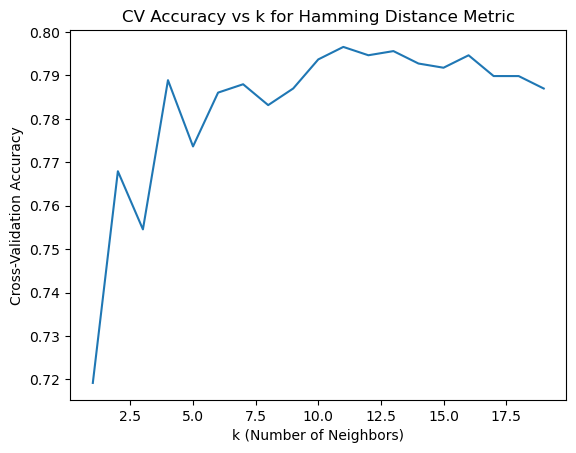

Best K value: 11, Best Cross-Validation Accuracy: 0.7965504670767828


In [7]:
# Manhatten distance metrix 

cv_scores = []  # Initialize the list to store cross-validation scores

for k in k_values:
    knn_hamming = KNeighborsClassifier(n_neighbors=k, metric='hamming', p=2)
    scores = cross_val_score(knn_hamming, X_train_scaled, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(np.mean(scores))  # Average cross-validation score

cv_scores_loss = [1 - score for score in cv_scores]  # Calculate the loss (1 - accuracy)

# Plot the cross-validation accuracy vs. k
plt.plot(k_values, cv_scores)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("CV Accuracy vs k for Hamming Distance Metric")
plt.show()

"""
# Plot the cross-validation losses vs. k
plt.plot(k_values, cv_scores_loss)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Cross-Validation Losses")
plt.title("Cross-Validation Losses vs k for Parsimonious KNN")
plt.show()

"""
best_k = k_values[np.argmax(cv_scores)]  # k with highest accuracy
best_cv_score = np.max(cv_scores)

print(f"Best K value: {best_k}, Best Cross-Validation Accuracy: {best_cv_score}")

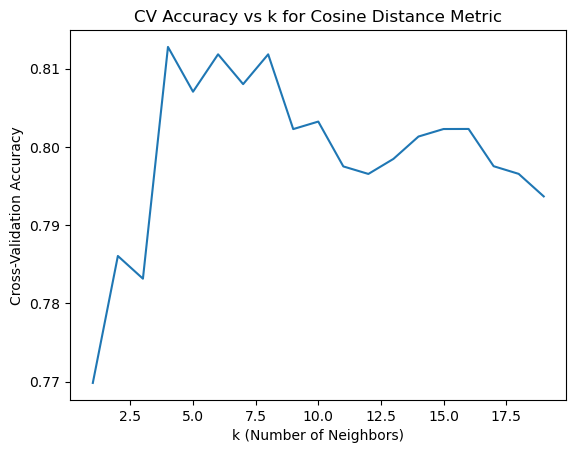

Best K value: 4, Best Cross-Validation Accuracy: 0.8127728411938937


In [8]:
# Manhatten distance metrix 

cv_scores = []  # Initialize the list to store cross-validation scores

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(np.mean(scores))  # Average cross-validation score

cv_scores_loss = [1 - score for score in cv_scores]  # Calculate the loss (1 - accuracy)

# Plot the cross-validation accuracy vs. k
plt.plot(k_values, cv_scores)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("CV Accuracy vs k for Cosine Distance Metric")
plt.show()

"""
# Plot the cross-validation losses vs. k
plt.plot(k_values, cv_scores_loss)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Cross-Validation Losses")
plt.title("Cross-Validation Losses vs k for Parsimonious KNN")
plt.show()

"""
best_k = k_values[np.argmax(cv_scores)]  # k with highest accuracy
best_cv_score = np.max(cv_scores)

print(f"Best K value: {best_k}, Best Cross-Validation Accuracy: {best_cv_score}")

# Question 4 - Regression Wine Quality 

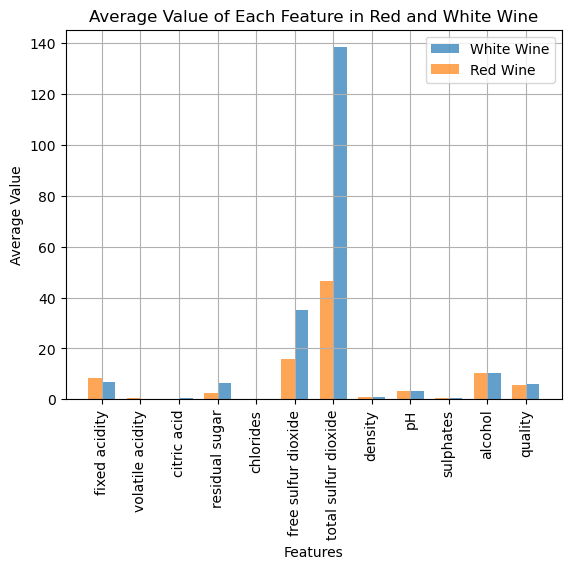

In [9]:
red_wine_df.head()

# Calculatign the average of each column in the red wine dataset into a dictionary
red_wine_mean = dict(red_wine_df.mean())
white_wine_mean = dict(white_wine_df.mean())

bar_width = 0.35
index = np.arange(len(red_wine_mean))  # list of positions per feature 

# Ploting the bar chart for both wine types
plt.bar(index + bar_width, white_wine_mean.values(), bar_width, alpha=0.7, label='White Wine')
plt.bar(index, red_wine_mean.values(), bar_width, alpha=0.7, label='Red Wine')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.title('Average Value of Each Feature in Red and White Wine')
plt.xticks(index + bar_width / 2, red_wine_mean.keys(), rotation=90)  # Center the feature names between the bars
plt.legend()
plt.grid(True)
plt.show()




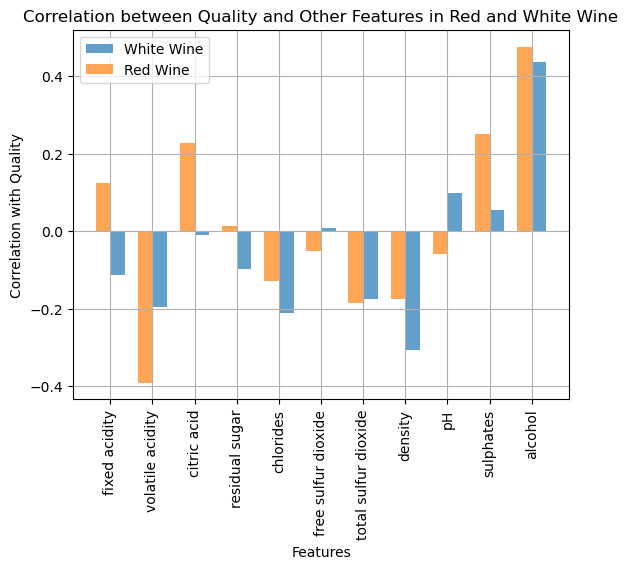

In [10]:
# Dependent variable
Y_red = red_wine_df['quality']
Y_white = white_wine_df['quality']

# Independent variables
X_red = red_wine_df.drop(columns='quality')
X_white = white_wine_df.drop(columns='quality')

# Correlation between quality and other features in red and white wine
red_corr = red_wine_df.corr()['quality'].drop('quality')
white_corr = white_wine_df.corr()['quality'].drop('quality')

# Plotting the correlation between quality and other features in red and white wine
bar_width = 0.35
index = np.arange(len(red_corr))  # x-positions for red wine

#plt.figure(figsize=(15, 7))
plt.bar(index + bar_width, white_corr.values, bar_width, alpha=0.7, label='White Wine')
plt.bar(index, red_corr.values, bar_width, alpha=0.7, label='Red Wine')
plt.xlabel('Features')
plt.ylabel('Correlation with Quality')
plt.title('Correlation between Quality and Other Features in Red and White Wine')
plt.xticks(index + bar_width / 2, red_corr.index, rotation=90)
plt.grid(True)
plt.legend()
plt.show()



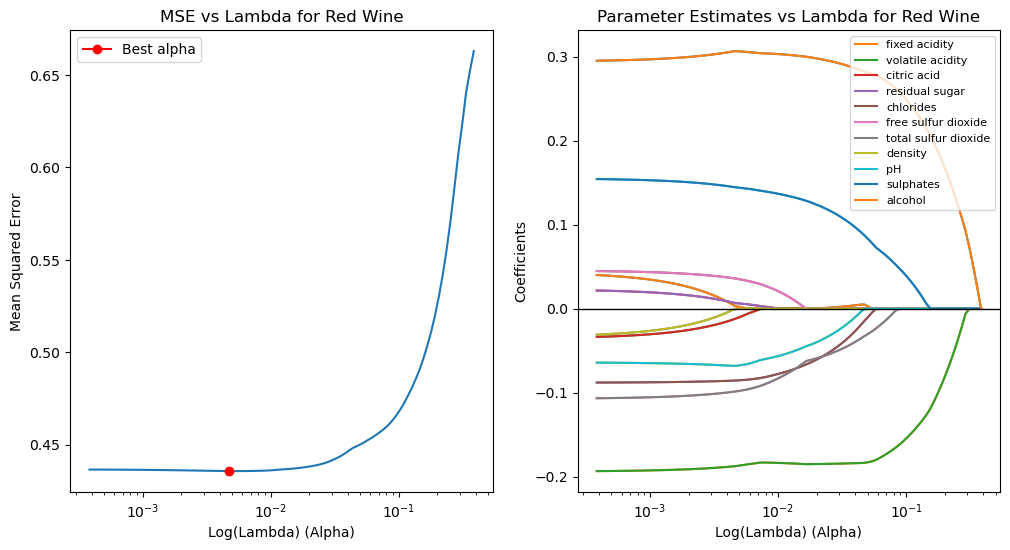

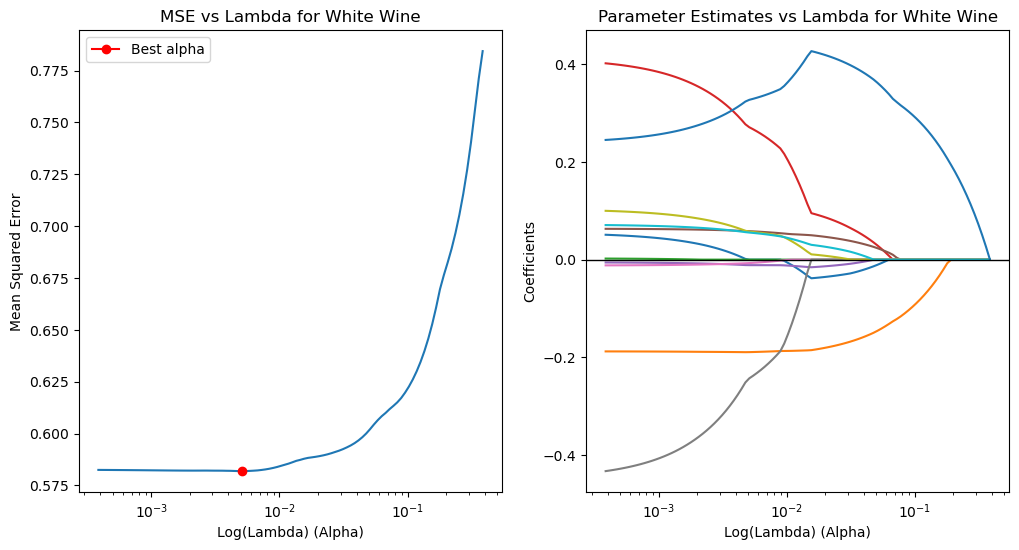

Best alpha (lambda) for red wine: 0.004739273801659686
Best alpha (lambda) for white wine: 0.00509902297591508
Accuracy for red wine: 0.3595569689235846
Accuracy for white wine: 0.2794622117769341
MSE for red wine: 0.4356796557434007
R-squared for red wine: 0.3595569689235846

Performance Metrics for Red Wine Linear Regression
Accuracy for red wine linear regression: 0.3605517030386881
MSE for red wine linear regression: 0.41676716722140805
R-squared for red wine linear regression: 0.3605517030386881


In [26]:
# Standardizing the features
scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red)
X_white_scaled = scaler.fit_transform(X_white)

# Performing LassoCV for red wine
lasso_red = LassoCV(cv=5, max_iter=100)
lasso_red.fit(X_red_scaled, Y_red)

# Performing Lasso regression with cross-validation for white wine
lasso_white = LassoCV(cv=5, max_iter=100)
lasso_white.fit(X_white_scaled, Y_white)

# Plot MSE vs. alpha (lambda) for red wine
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
#plt.plot(lasso_red.alphas_, lasso_red.mse_path_, linestyle='--')
#plt.subplot(1, 2, 1)
plt.semilogx(lasso_red.alphas_, np.mean(lasso_red.mse_path_, axis=1))  # Plot average MSE path
plt.plot(lasso_red.alpha_, np.min(np.mean(lasso_red.mse_path_, axis=1)), marker='o', color='red', label='Best alpha')  # Best alpha
plt.xlabel('Log(Lambda) (Alpha)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Lambda for Red Wine')
plt.legend()

# Plot parameter estimates (coefficients) vs alpha for red wine
plt.subplot(1, 2, 2)
alphas_lasso, coefs_lasso, _ = lasso_red.path(X_red_scaled, Y_red, alphas=lasso_red.alphas_)
plt.semilogx(alphas_lasso, coefs_lasso.T)
for i in range(coefs_lasso.shape[0]):
    plt.semilogx(alphas_lasso, coefs_lasso[i, :], label=X_red.columns[i])
plt.xlabel('Log(Lambda) (Alpha)')
plt.ylabel('Coefficients')
plt.title('Parameter Estimates vs Lambda for Red Wine')
plt.axhline(0, color='black', linewidth=1)
plt.legend(loc='upper right', fontsize=8)



# Plot MSE vs alpha (lambda) for white wine
plt.figure(figsize=(12, 6))

# Plot MSE vs alpha for white wine
plt.subplot(1, 2, 1)
plt.semilogx(lasso_white.alphas_, np.mean(lasso_white.mse_path_, axis=1))  # Plot average MSE path
plt.plot(lasso_white.alpha_, np.min(np.mean(lasso_white.mse_path_, axis=1)), marker='o', color='red', label='Best alpha')  # Best alpha
plt.xlabel('Log(Lambda) (Alpha)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Lambda for White Wine')
plt.legend()

# Plot parameter estimates (coefficients) vs alpha for white wine
plt.subplot(1, 2, 2)
plt.semilogx(lasso_white.alphas_, lasso_white.path(X_white_scaled, Y_white, alphas=lasso_white.alphas_)[1].T)
plt.xlabel('Log(Lambda) (Alpha)')
plt.ylabel('Coefficients')
plt.title('Parameter Estimates vs Lambda for White Wine')
plt.axhline(0, color='black', linewidth=1)
plt.show()

# Best alpha for red wine and white wine
print(f"Best alpha (lambda) for red wine: {lasso_red.alpha_}")
print(f"Best alpha (lambda) for white wine: {lasso_white.alpha_}")

# Accuracy of the model with the best alpha for red wine and white wine
print(f"Accuracy for red wine: {lasso_red.score(X_red_scaled, Y_red)}")
print(f"Accuracy for white wine: {lasso_white.score(X_white_scaled, Y_white)}")

mse_red = np.min(np.mean(lasso_red.mse_path_, axis=1))  
print(f"MSE for red wine: {mse_red}")

r_squared_red = lasso_red.score(X_red_scaled, Y_red)
print(f"R-squared for red wine: {r_squared_red}")


# Classification report for red wine


"""
# MSE for red wine and white wine
print(f"MSE for red wine: {np.min(np.mean(lasso_red.mse_path_, axis=1))}")
print(f"MSE for white wine: {np.min(np.mean(lasso_white.mse_path_, axis=1))}")
# R-squared for red wine and white wine
print(f"R-squared for red wine: {lasso_red.score(X_red_scaled, Y_red)}")
print(f"R-squared for white wine: {lasso_white.score(X_white_scaled, Y_white)}")
"""


# Linear regression for red wine 
lin_reg_red = LinearRegression()
lin_reg_red.fit(X_red_scaled, Y_red)


# Accuracy, MSE, and R-squared for red wine linear regression
print("\nPerformance Metrics for Red Wine Linear Regression")
print(f"Accuracy for red wine linear regression: {lin_reg_red.score(X_red_scaled, Y_red)}")
print(f"MSE for red wine linear regression: {np.mean((lin_reg_red.predict(X_red_scaled) - Y_red) ** 2)}")
print(f"R-squared for red wine linear regression: {lin_reg_red.score(X_red_scaled, Y_red)}")


In [15]:
from sklearn.metrics import mean_squared_error

# Creating a new KNN regression model using the selected features

# Identifying important features (non-zero coefficients)
selected_features_red = X_red.columns[(lasso_red.coef_ != 0)]
selected_features_white = X_white.columns[(lasso_white.coef_ != 0)]
print(f"Selected features for red wine: {selected_features_red}")
print(f"Selected features for white wine: {selected_features_white}")

# KNN regression model using selected features for red wine
X_red_selected = X_red_scaled[:, lasso_red.coef_ != 0]  # Extracting selected features
X_white_selected = X_white_scaled[:, lasso_white.coef_ != 0] 

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red_selected, Y_red, test_size=0.2, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white_selected, Y_white, test_size=0.2, random_state=42)

# Construct and train the KNN model for red wine
knn_red = KNeighborsRegressor(n_neighbors=5)
knn_red.fit(X_train_red, y_train_red)

# Construct and train the KNN model for white wine
knn_white = KNeighborsRegressor(n_neighbors=5)
knn_white.fit(X_train_white, y_train_white)

# Evaluate the models for red wine using MSE (Mean Squared Error)
y_pred_red = knn_red.predict(X_test_red)
mse_red = mean_squared_error(y_test_red, y_pred_red)
print(f'Mean Squared Error for KNN Regression on Red Wine: {mse_red}')

# Evaluate the models for white wine using MSE (Mean Squared Error)
y_pred_white = knn_white.predict(X_test_white)
mse_white = mean_squared_error(y_test_white, y_pred_white)
print(f'Mean Squared Error for KNN Regression on White Wine: {mse_white}')

# Optionally, evaluate the KNN model using cross-validation
cv_scores_red = cross_val_score(knn_red, X_red_selected, Y_red, cv=5, scoring='neg_mean_squared_error')
cv_scores_white = cross_val_score(knn_white, X_white_selected, Y_white, cv=5, scoring='neg_mean_squared_error')

# Print average cross-validation MSE
print(f"Average cross-validation MSE for KNN Red Wine: {-np.mean(cv_scores_red)}")
print(f"Average cross-validation MSE for KNN White Wine: {-np.mean(cv_scores_white)}")

# Predicting the quality of red wine
y_pred_red = knn_red.predict(X_test_red)
y_pred_white = knn_white.predict(X_test_white)

# Model Evaluation
print("Red Wine:")
print("Mean Squared Error:", mean_squared_error(y_test_red, y_pred_red))
print("White Wine:")
print("Mean Squared Error:", mean_squared_error(y_test_white, y_pred_white))

# R squared value
print("Red Wine:")
print("R squared value:", knn_red.score(X_test_red, y_test_red))
print("White Wine:")
print("R squared value:", knn_white.score(X_test_white, y_test_white))




Selected features for red wine: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')
Selected features for white wine: Index(['volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')
Mean Squared Error for KNN Regression on Red Wine: 0.42099999999999993
Mean Squared Error for KNN Regression on White Wine: 0.48506122448979594
Average cross-validation MSE for KNN Red Wine: 0.5153021159874607
Average cross-validation MSE for KNN White Wine: 0.6485926664026181
Red Wine:
Mean Squared Error: 0.42099999999999993
White Wine:
Mean Squared Error: 0.48506122448979594
Red Wine:
R squared value: 0.3557823637531944
White Wine:
R squared value: 0.37368876747100044
